In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [26]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

<module 'keras.api.datasets.mnist' from 'D:\\users\\Lib\\site-packages\\keras\\api\\datasets\\mnist\\__init__.py'>

In [20]:
X_train = X_train / 255.0
X_test = X_test / 255.0 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [10]:
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28*28,)),  
    layers.Dense(64, activation='relu'),  
    layers.Dense(10, activation='softmax') 
])

D:\users\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model

<Sequential name=sequential, built=True>

In [14]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8637 - loss: 0.4751 - val_accuracy: 0.9596 - val_loss: 0.1378
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9641 - loss: 0.1192 - val_accuracy: 0.9590 - val_loss: 0.1309
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9769 - loss: 0.0756 - val_accuracy: 0.9706 - val_loss: 0.1018
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9844 - loss: 0.0536 - val_accuracy: 0.9716 - val_loss: 0.0971
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9859 - loss: 0.0453 - val_accuracy: 0.9713 - val_loss: 0.0992
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9903 - loss: 0.0304 - val_accuracy: 0.9699 - val_loss: 0.1076
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9910 - loss: 0.0271 - val_accuracy: 0.9747 - val_loss: 0.0923
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9930 - loss: 0.0208 - 

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9743 - loss: 0.1030
Test accuracy: 0.9772


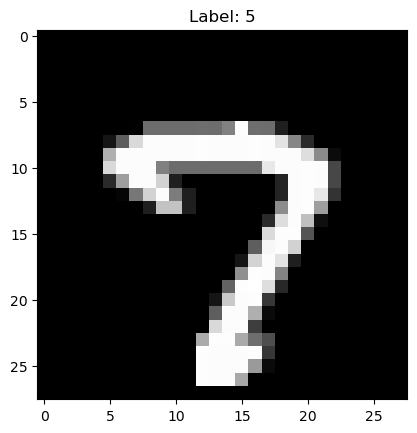

In [34]:
import matplotlib.pyplot as plt

# Reshape the flattened image (784,) back to its original shape (28, 28)
image = X_train[5].reshape(28, 28)

# Display the reshaped image
plt.imshow(image, cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.show()


In [42]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

image_size = (128, 128) 

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  
)

train_generator = train_datagen.flow_from_directory(
    r"D:\3 rd sem\dl datasets\dog dataset", 
    target_size=image_size,
    batch_size=32,
    class_mode='categorical', 
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    r"D:\3 rd sem\dl datasets\dog dataset",  
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Step 2: Build the Convolutional Neural Network (CNN)
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Adjust to the number of dog breeds
])

# Step 3: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Step 5: Predict a single image
# Load a single image and preprocess it
img_path = r"C:\Users\Moulishwaran\OneDrive\Pictures\Dog image\image11.jpeg"
img = tf.keras.preprocessing.image.load_img(img_path, target_size=image_size)
img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the breed of the dog
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Print the predicted class
print(f"Predicted dog breed: {train_generator.class_indices}")


Found 557 images belonging to 14 classes.
Found 137 images belonging to 14 classes.


D:\users\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\users\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.0648 - loss: 2.7560

D:\users\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 693ms/step - accuracy: 0.0645 - loss: 2.7526 - val_accuracy: 0.0949 - val_loss: 2.6373
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 497ms/step - accuracy: 0.1221 - loss: 2.6328 - val_accuracy: 0.1241 - val_loss: 2.6228
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 501ms/step - accuracy: 0.1596 - loss: 2.5819 - val_accuracy: 0.1825 - val_loss: 2.6023
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 530ms/step - accuracy: 0.2182 - loss: 2.3871 - val_accuracy: 0.2263 - val_loss: 2.5039
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 499ms/step - accuracy: 0.3448 - loss: 2.1401 - val_accuracy: 0.2263 - val_loss: 2.5171
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 523ms/step - accuracy: 0.4341 - loss: 1.9003 - val_accuracy: 0.2555 - val_loss: 2.6451
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 521ms/step - accuracy: 0.5001 - loss: 1.6036 - val_accuracy: 0.3869 - val_loss: 2.3999
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 498ms/step - accuracy: 0.6374 - loss: 1.2555 - val_accuracy: 0.3869 - val

In [48]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 150, 150  
batch_size = 32
train_data_dir = r"D:\3 rd sem\dl datasets\dog dataset"  
validation_data_dir = r"D:\3 rd sem\dl datasets\dog dataset"  
num_classes = 14 

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0, 
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  
)

model = models.Sequential()
model.add(layers.Flatten(input_shape=(img_height, img_width, 3)))  
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax')) 

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

model.fit(train_generator, 
          steps_per_epoch=train_generator.samples // batch_size,
          epochs=10, 
          validation_data=validation_generator, 
          validation_steps=validation_generator.samples // batch_size)

val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {val_accuracy:.4f}')


Found 694 images belonging to 14 classes.
Found 694 images belonging to 14 classes.
Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 893ms/step - accuracy: 0.0784 - loss: 30.6988 - val_accuracy: 0.0699 - val_loss: 7.1340
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0625 - loss: 7.9407 - val_accuracy: 0.0000e+00 - val_loss: 9.1329


D:\users\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 813ms/step - accuracy: 0.0653 - loss: 5.7057 - val_accuracy: 0.1116 - val_loss: 3.3868
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0312 - loss: 3.1562 - val_accuracy: 0.0455 - val_loss: 2.9748
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 867ms/step - accuracy: 0.0882 - loss: 3.2491 - val_accuracy: 0.0774 - val_loss: 3.2153
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0625 - loss: 3.5206 - val_accuracy: 0.0000e+00 - val_loss: 3.2985
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 790ms/step - accuracy: 0.0703 - loss: 3.1667 - val_accuracy: 0.1027 - val_loss: 2.8083
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 2.9971 - val_accuracy: 0.1818 - val_loss: 2.6644
Epoch 9/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 793ms/step - accuracy: 0.0826 - loss: 2.9261 - val_accuracy: 0.0997 - val_loss: 3.2832
Epoch 10/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0312 - loss: 3.3706 - val_accur